In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
#Load the File

file='../project-two/sat_scores.csv'

#This reads data column wise
reader=pd.read_csv('sat_scores.csv').to_dict('list')
print(reader)

#This reads data row wise
#reader=csv.DictReader(open('sat_scores.csv'))
#x = []       
#for line in rows:
   # x.append(line)
#print(x)

{'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4, 45], 'Verbal': [509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 567, 577, 564, 584, 562, 575, 593, 577, 592, 566, 506], 'Math': [510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
df=pd.DataFrame([reader])
print(df)


                                                Math  \
0  [510, 513, 515, 505, 516, 499, 499, 506, 500, ...   

                                                Rate  \
0  [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 6...   

                                               State  \
0  [CT, NJ, MA, NY, NH, RI, PA, VT, ME, VA, DE, M...   

                                              Verbal  
0  [509, 499, 511, 495, 520, 501, 500, 511, 506, ...  


In [4]:
df2=pd.read_csv('../project-two/sat_scores.csv')
df2.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [5]:
df2.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [6]:
df2.columns
df2.dtypes
df2.shape

(52, 4)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


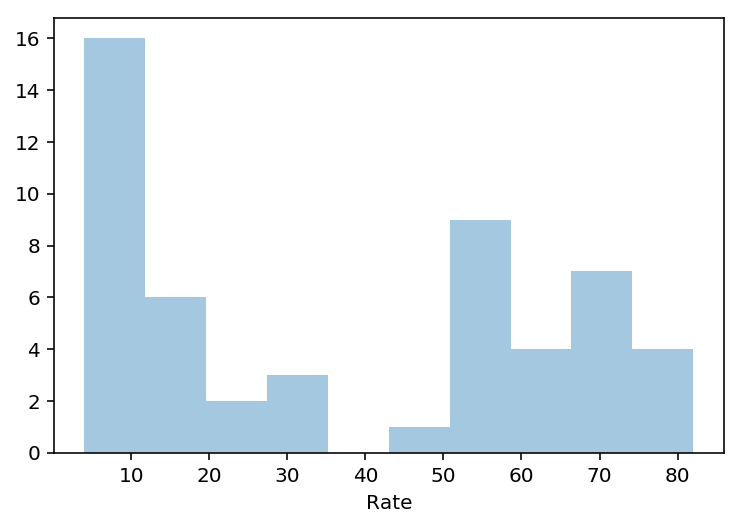

In [7]:
import seaborn as sn
r=df2.Rate

sn.distplot(r,bins=10,kde=False)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


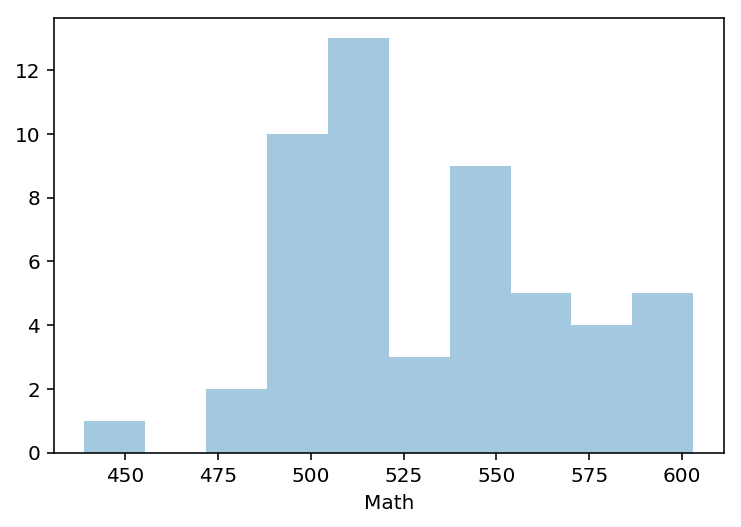

In [8]:
m=df2.Math
sn.distplot(m,bins=10,kde=False)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


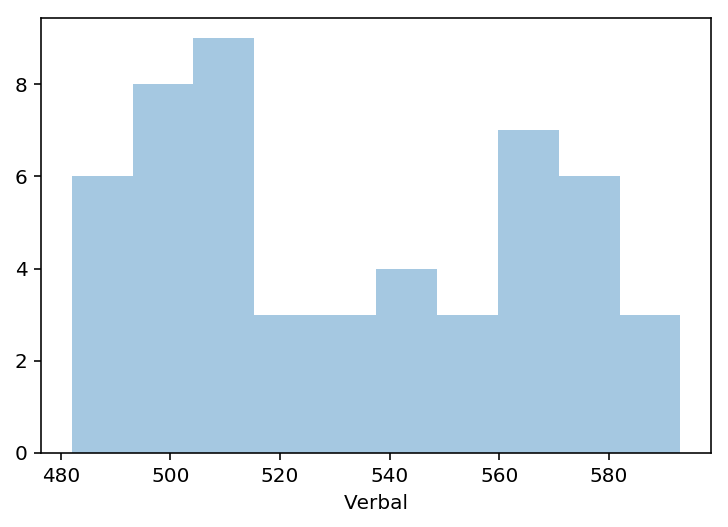

In [9]:
v=df2.Verbal
sn.distplot(v,bins=10,kde=False)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

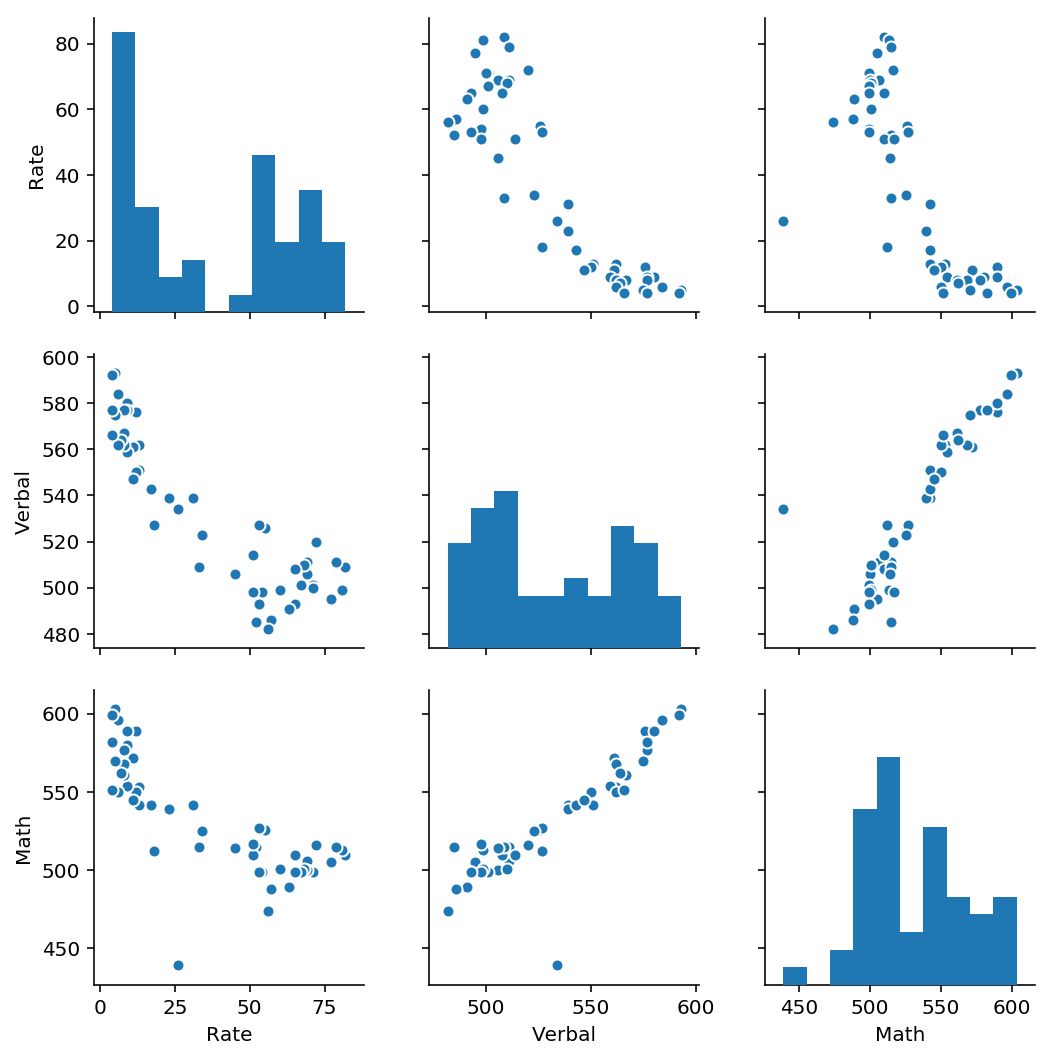

In [10]:

sn.pairplot(df2)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

In [11]:
df2.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


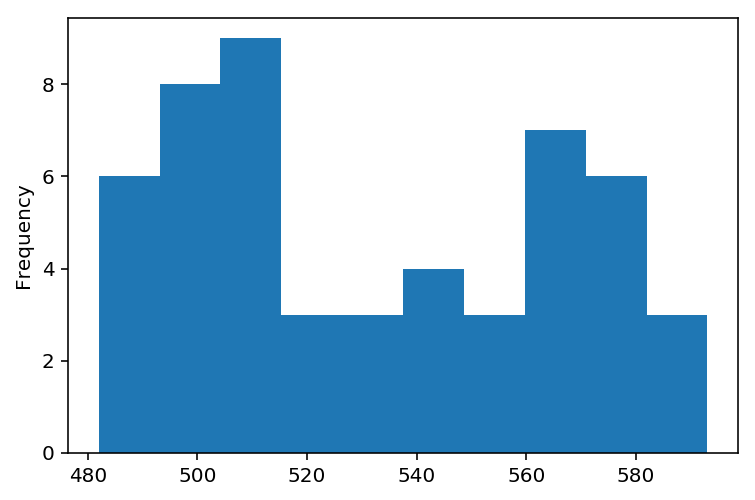

In [12]:
import matplotlib.pyplot as plt
#df2.plot(kind='hist')
df2.Verbal.plot.hist()

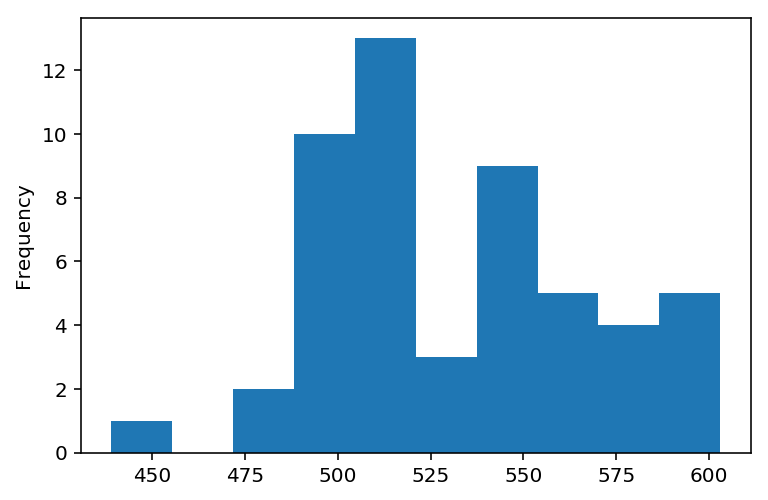

In [13]:
df2.Math.plot.hist()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

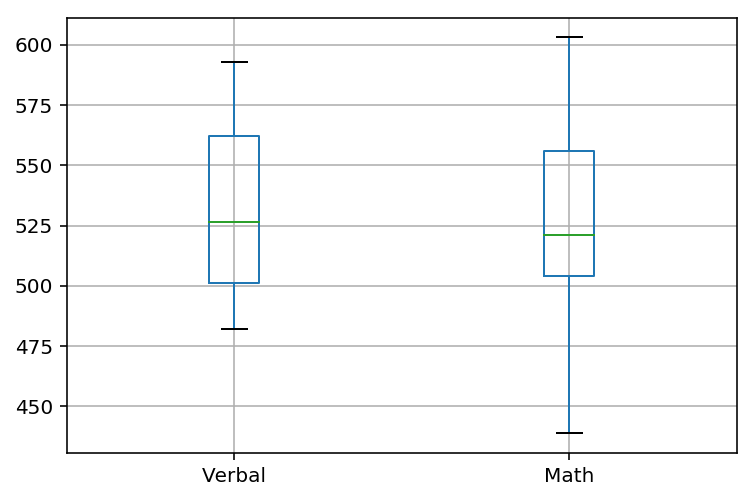

In [14]:
df2.boxplot(column=['Verbal','Math'])

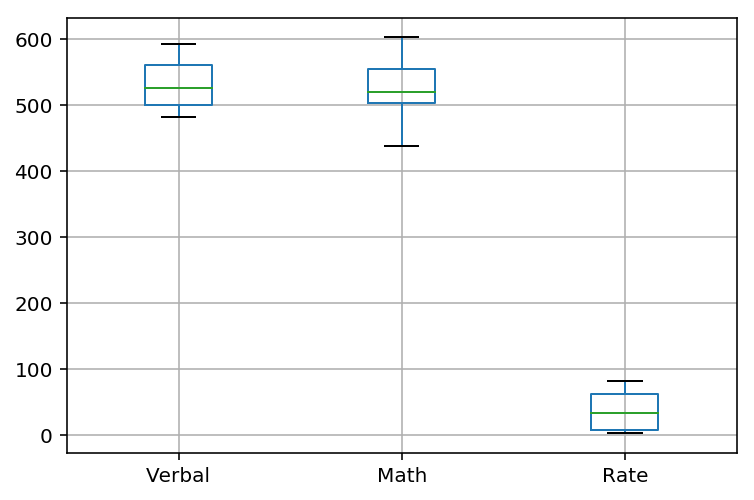

In [15]:
df2.boxplot(column=['Verbal','Math','Rate'])

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [16]:
#standadize the variable
#subset_vmr=df2['Verbal','Math']

In [17]:
#df2_rescalling=(df2-df2.mean())/(df2.std())

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [18]:
subset1=df2.Verbal>df2.Verbal.mean()
df2[subset1].State.count()


24

In [19]:
#24 states verbal scores are above the mean. Almost half of the states verbal 

In [20]:
df2.count()

State     52
Rate      52
Verbal    52
Math      52
dtype: int64

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [21]:
df2_vmedian=df2.State[df2.Verbal>df2.Verbal.median()]
df2_vmedian.count()

26

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [22]:
df2['Ver-Mat']=df2.Verbal-df2.Math


In [23]:
df2.head()

,State,Rate,Verbal,Math,Ver-Mat
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [24]:
subset_vm=df2.loc[df2.Verbal>df2.Math,:].sort_values('Ver-Mat',ascending=False).head(10)
subset_vm

,State,Rate,Verbal,Math,Ver-Mat
27,OH,26,534,439,95
29,WV,18,527,512,15
50,MS,4,566,551,15
45,AR,6,562,550,12
31,TN,13,562,553,9
9,VA,68,510,501,9
32,NM,13,551,542,9
16,DC,56,482,474,8
41,OK,8,567,561,6
8,ME,69,506,500,6


In [25]:
df2['Mat-Ver']=df2.Math-df2.Verbal
subset_vm2=df2.loc[df2.Math>df2.Verbal,:].sort_values('Mat-Ver',ascending=False).head(10)
subset_vm2

,State,Rate,Verbal,Math,Ver-Mat,Mat-Ver
21,HI,52,485,515,-30,30
23,CA,51,498,517,-19,19
1,NJ,81,499,513,-14,14
33,IL,12,576,589,-13,13
44,WI,6,584,596,-12,12
36,MI,11,561,572,-11,11
3,NY,77,495,505,-10,10
47,IA,5,593,603,-10,10
37,MN,9,580,589,-9,9
51,All,45,506,514,-8,8


In [26]:
print(subset_vm.head(3))
print(subset_vm2.head(3))

   State  Rate  Verbal  Math  Ver-Mat
27    OH    26     534   439       95
29    WV    18     527   512       15
50    MS     4     566   551       15
   State  Rate  Verbal  Math  Ver-Mat  Mat-Ver
21    HI    52     485   515      -30       30
23    CA    51     498   517      -19       19
1     NJ    81     499   513      -14       14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [27]:
df2.corr()
Verbal and Math has positive corelation.
Verbal and Rate has negative corelation.

SyntaxError: invalid syntax (<ipython-input-27-9c7fe80f4bdd>, line 2)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [ ]:
df2.describe()


In [ ]:
count - This counts the number of rows in the dataframe
mean  - This calculate average for each column for all the states
std - This returns the standard deviation of each column
min - This finds minium value in each column
25% - This gives value at the 25th percentile
50% - This gives value of 50th perventile
75% - This gets the value at the 75th percentile
max - Get the highest value of each column

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [30]:
drug_path='../project-two/drug-use-by-age.csv'

drug_df=pd.read_csv(drug_path)
#drug_df.head(15)
drug_df.isnull().values.any()

False

In [31]:
Yes this needs cleaning
No, but there are some hypent 

SyntaxError: invalid syntax (<ipython-input-31-adbe3f80736e>, line 1)

In [ ]:
drug_df.columns=['Age','Alcoholuse','Alcoholfreq','marijuanause','marijuanafreq','cocaineuse','cocainefreq'
                ,'crackuse','crackfreq','heroinuse','heroinfreq']

## drug_df.drop(['n'],axis=1,inplace=True)
drug_df.iloc[10]

In [ ]:
drug_df.columns

In [ ]:
#drug_df=drug_df.map(lambda x: np.nan if x == '-' else float(x))

In [ ]:
drug_df.columns=['age', 'alcoholuse', 'alcoholfreq', 'marijuanause',
       'marijuanafreq', 'cocaineuse', 'cocainefreq', 'crackuse',
       'crackfreq', 'heroinuse', 'heroinfreq', 'hallucinogenuse',
       'hallucinogenfreq', 'inhalantuse', 'inhalantfreq',
       'painreleiveruse', 'painreleiverfreq', 'oxycontinuse',
       'oxycontinfreq', 'tranquilizeruse', 'tranquilizerfreq',
       'stimulantuse', 'stimulantfreq', 'methuse', 'methfreq',
       'sedativeuse', 'sedativefreq']

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [ ]:
drug_df.corr()
In Age group 22-23, 84% of them are drinking Alcohol .
Alcohol usage is highly corelated with marijuanause.These two variables has got strong
positive corelation
Alcoholuse having positive corelation with cocaine and crack use.
marijuana use is strong positive corelation with hallucinogen,painreleive,oxycontin,tranquilizer
and stimulant use.
Age group 19 and 20 highly use marijuana.

In [ ]:
#drug_df.corr()

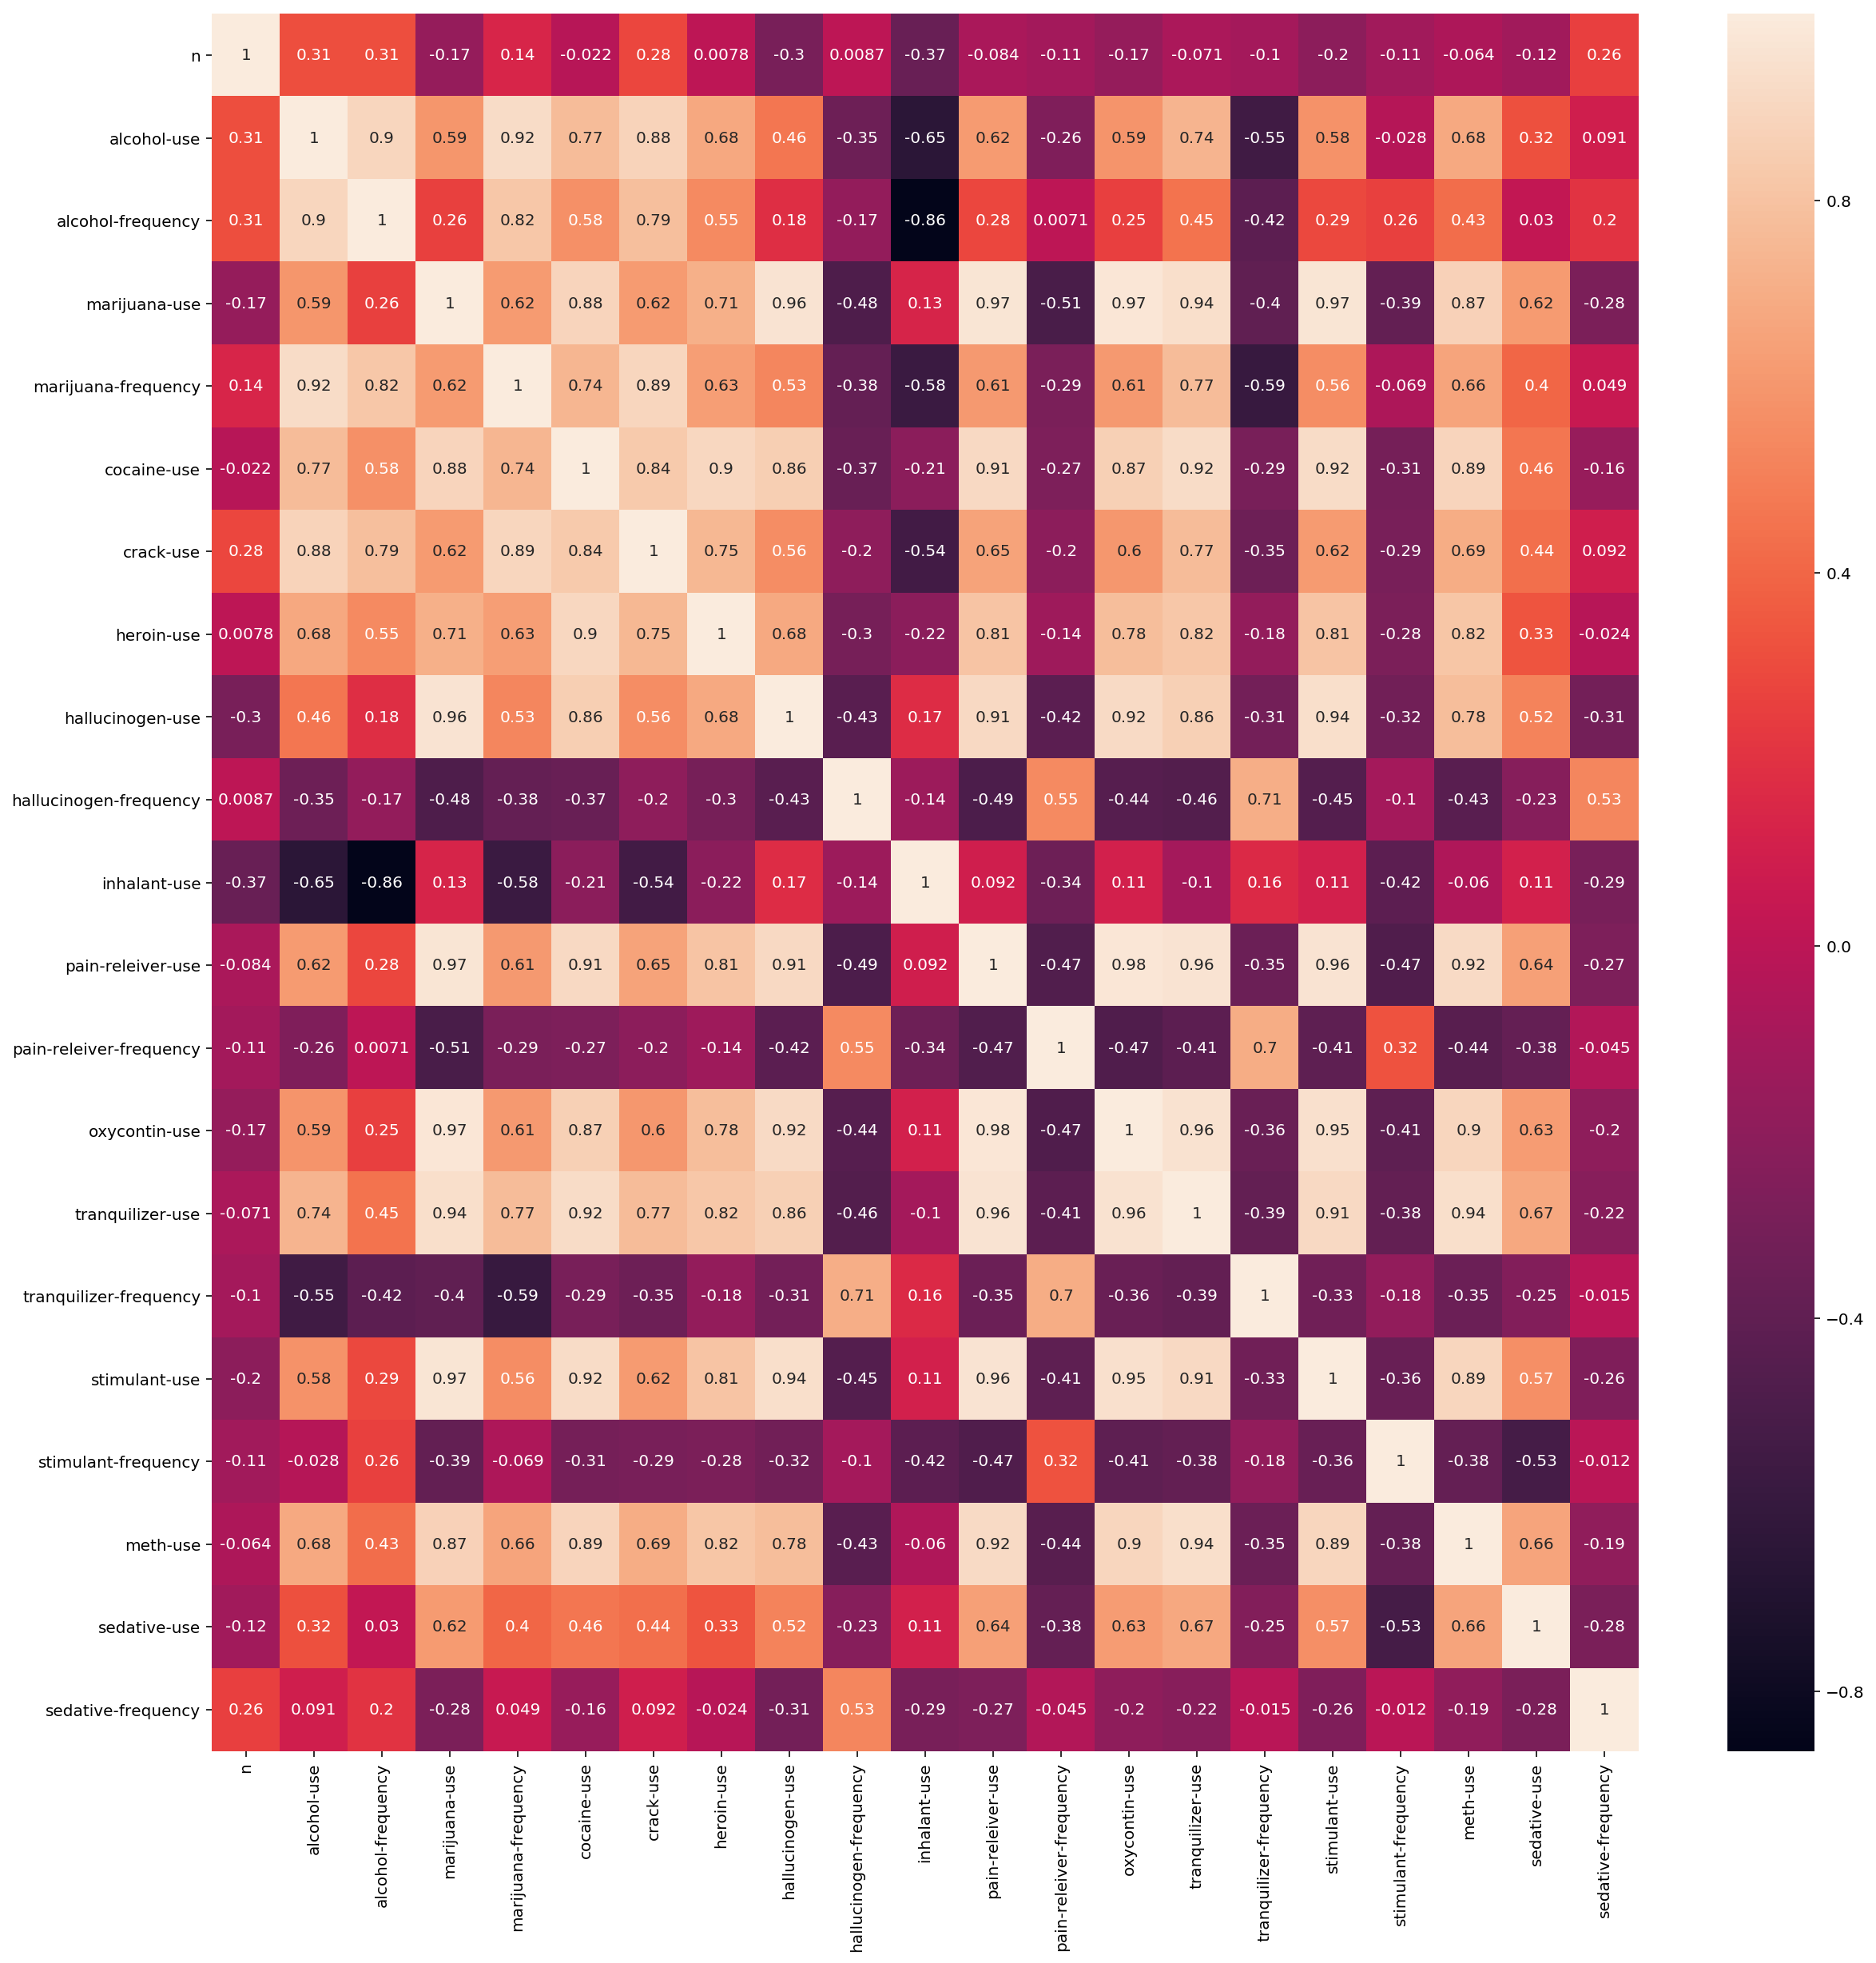

In [32]:

drug_df.corr()
plt.figure(figsize=(20,20))
sn.heatmap(drug_df.corr(),annot=True)

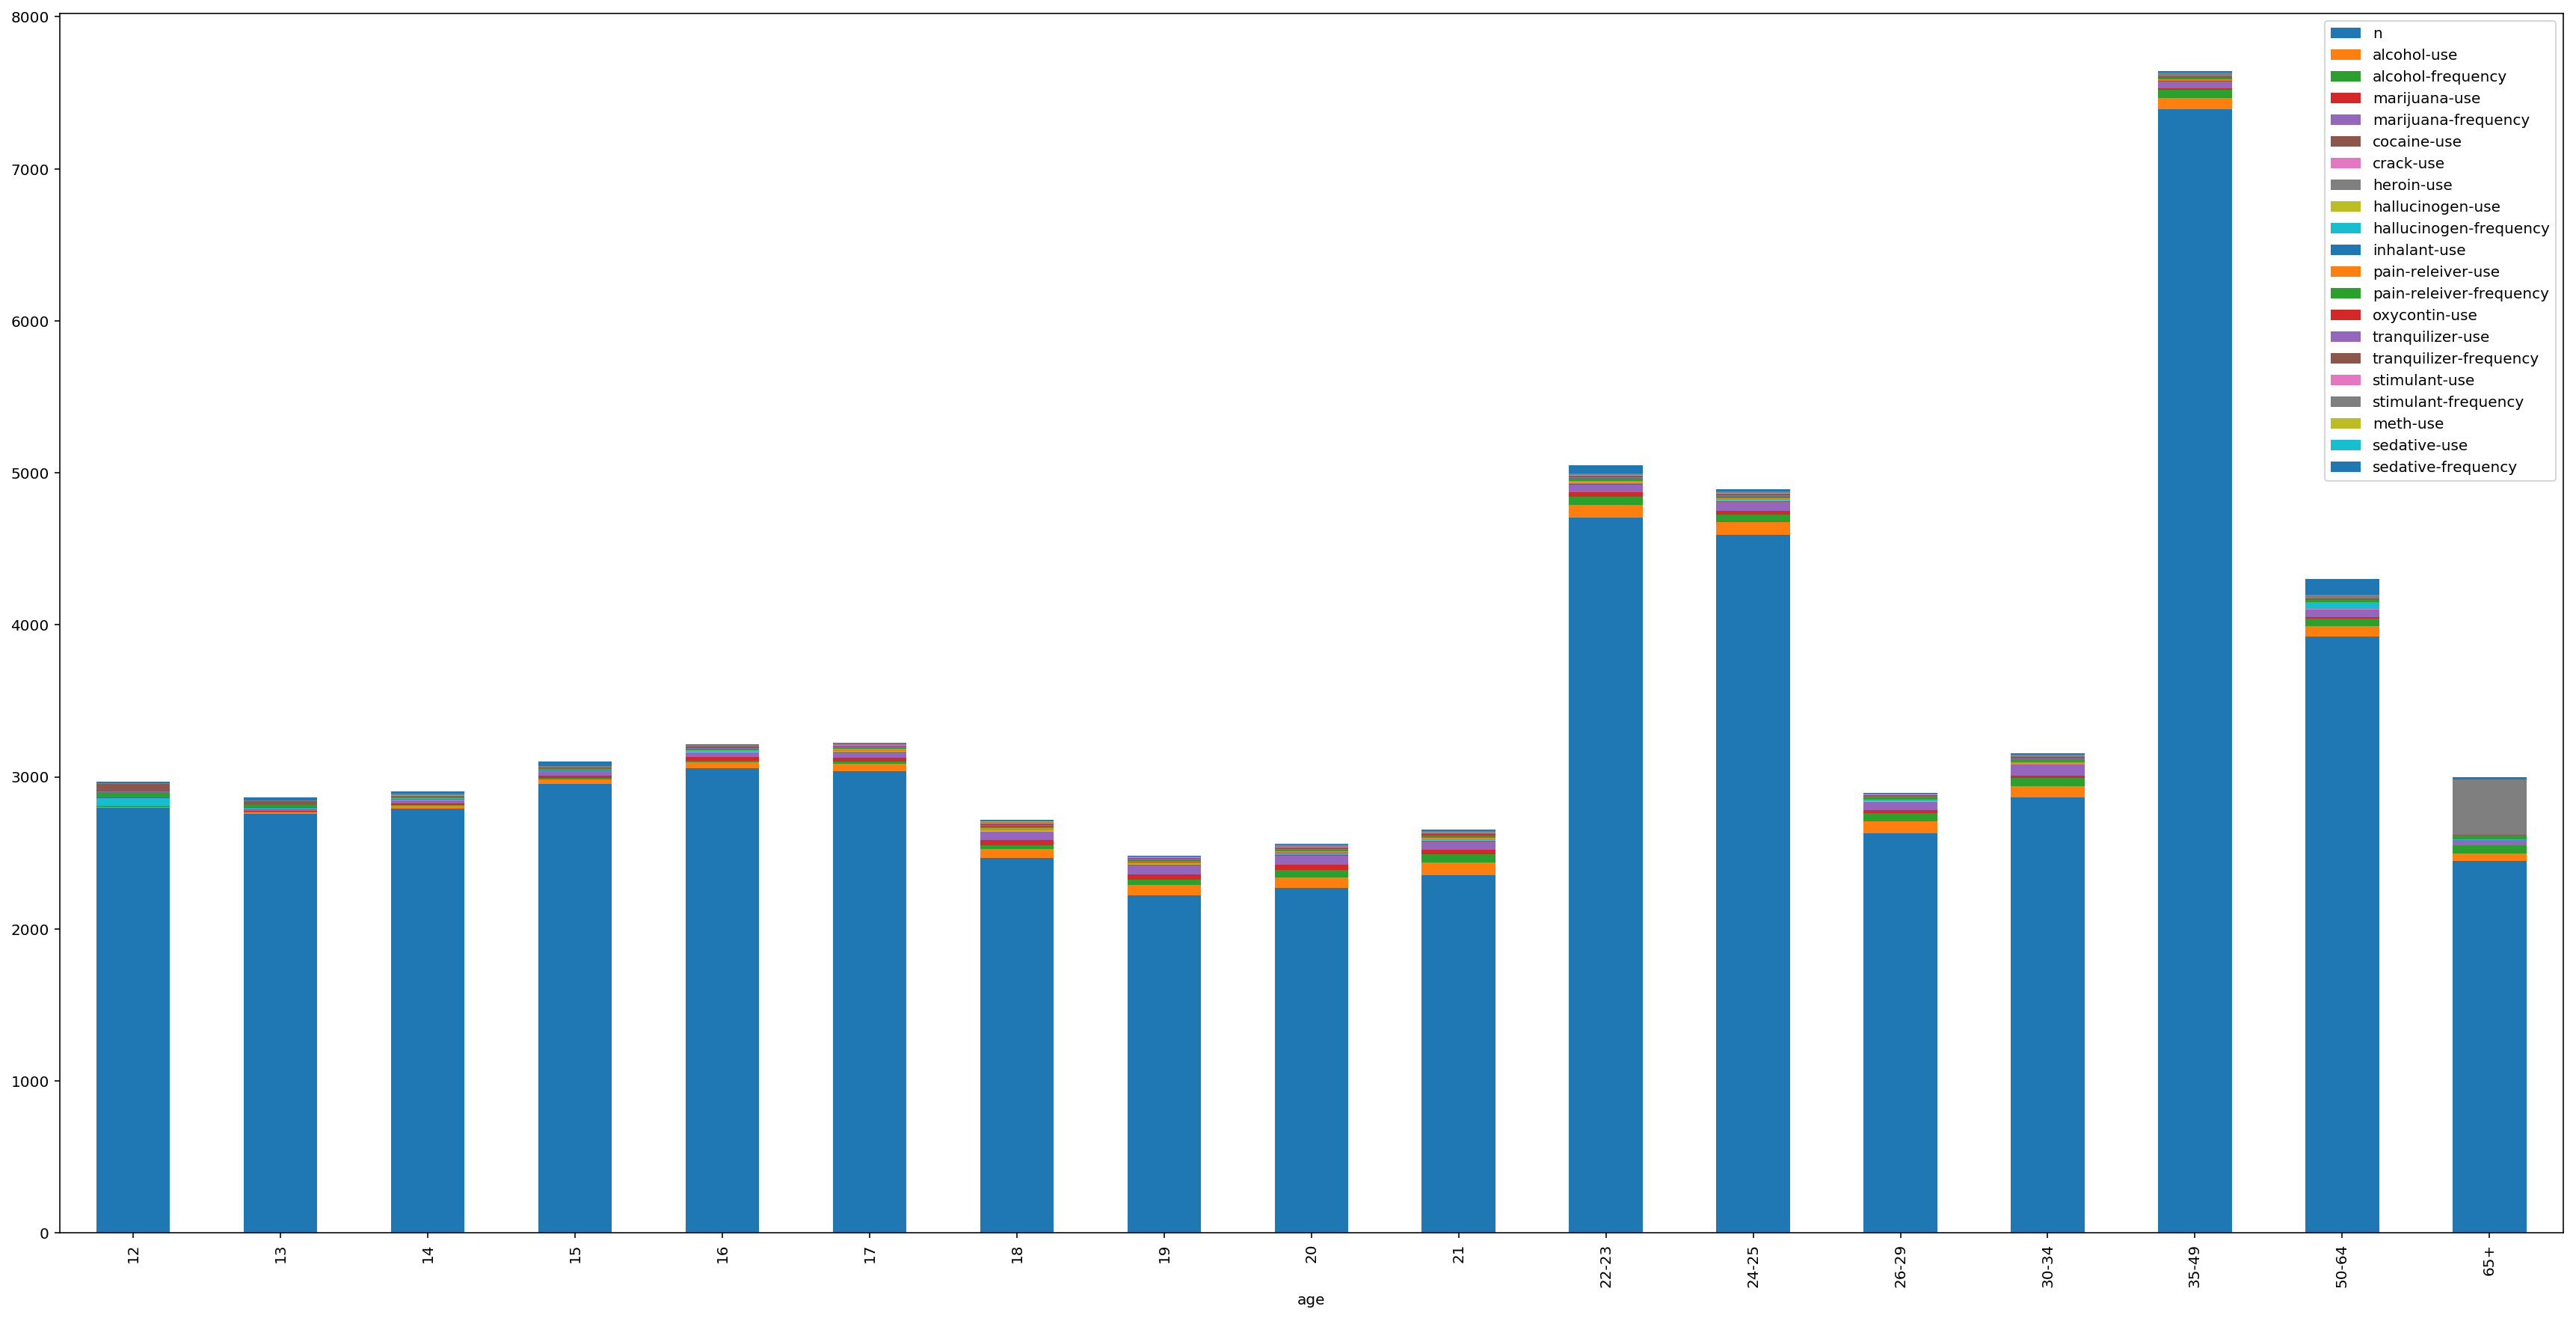

In [33]:
drug_df.plot(x= 'age', kind = 'bar', stacked =True,figsize=(30,15))

In [40]:
#sn.pairplot(drug_df)
#pair_df = pd.DataFrame

al_mj_df = pd.DataFrame
(drugs_df[['age', 'alcohol_use','alcohol_frequency','marijuana_use','marijuana_frequency']])


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [ ]:
# Code
drug_df.mean()

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.